In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
train_data = pd.read_csv('train.csv')
print(train_data)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
train_data = train_data.drop(labels=['Cabin'],axis='columns')

In [12]:
print(train_data)

     PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0              1         0       3  ...         A/5 21171   7.2500         S
1              2         1       1  ...          PC 17599  71.2833         C
2              3         1       3  ...  STON/O2. 3101282   7.9250         S
3              4         1       1  ...            113803  53.1000         S
4              5         0       3  ...            373450   8.0500         S
..           ...       ...     ...  ...               ...      ...       ...
886          887         0       2  ...            211536  13.0000         S
887          888         1       1  ...            112053  30.0000         S
888          889         0       3  ...        W./C. 6607  23.4500         S
889          890         1       1  ...            111369  30.0000         C
890          891         0       3  ...            370376   7.7500         Q

[891 rows x 11 columns]


In [13]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [14]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
train_data = train_data.drop(labels=['Name','Ticket'],axis='columns')

In [18]:
print(train_data)

     PassengerId  Survived  Pclass     Sex  ...  SibSp  Parch     Fare  Embarked
0              1         0       3    male  ...      1      0   7.2500         S
1              2         1       1  female  ...      1      0  71.2833         C
2              3         1       3  female  ...      0      0   7.9250         S
3              4         1       1  female  ...      1      0  53.1000         S
4              5         0       3    male  ...      0      0   8.0500         S
..           ...       ...     ...     ...  ...    ...    ...      ...       ...
886          887         0       2    male  ...      0      0  13.0000         S
887          888         1       1  female  ...      0      0  30.0000         S
888          889         0       3  female  ...      1      2  23.4500         S
889          890         1       1    male  ...      0      0  30.0000         C
890          891         0       3    male  ...      0      0   7.7500         Q

[891 rows x 9 columns]


In [19]:
train_data = pd.get_dummies(train_data, columns=['Sex'])

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Sex_female   891 non-null    uint8  
 9   Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(2)
memory usage: 57.6+ KB


In [21]:
train_data = pd.get_dummies(train_data, columns=['Embarked'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


In [27]:
columns_selected = ['Pclass','Age', 'Parch', 'SibSp', 'Fare','Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Y = train_data['Survived']
X = train_data[columns_selected]

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Parch       891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [38]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

[Text(164.31490384615384, 210.645, 'X[6] <= 0.5\ngini = 0.471\nsamples = 623\nvalue = [386, 237]'),
 Text(64.48779585798816, 197.055, 'X[0] <= 1.5\ngini = 0.298\nsamples = 401\nvalue = [328, 73]'),
 Text(31.036686390532545, 183.465, 'X[1] <= 14.5\ngini = 0.49\nsamples = 77\nvalue = [44, 33]'),
 Text(28.39526627218935, 169.875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(33.67810650887574, 169.875, 'X[1] <= 24.5\ngini = 0.482\nsamples = 74\nvalue = [44, 30]'),
 Text(31.036686390532545, 156.285, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(36.319526627218934, 156.285, 'X[1] <= 28.5\ngini = 0.491\nsamples = 69\nvalue = [39, 30]'),
 Text(24.433136094674555, 142.695, 'X[4] <= 144.115\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(21.79171597633136, 129.10500000000002, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(27.074556213017754, 129.10500000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(48.20591715976332, 142.695, 'X[3] <= 0.5\ngini = 0.479\nsamples = 63\n

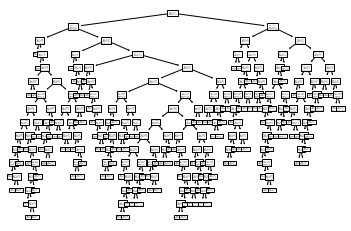

In [42]:
tree.plot_tree(clf) 

In [43]:
test_data = pd.read_csv('test.csv')
print(test_data)

     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
test_data["Age"] = test_data['Age'].fillna(test_data["Age"].mean())
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())

In [49]:
test_data = test_data.drop(["Cabin"], axis = 1)

In [50]:
print(test_data)

     PassengerId  Pclass  ...      Fare Embarked
0            892       3  ...    7.8292        Q
1            893       3  ...    7.0000        S
2            894       2  ...    9.6875        Q
3            895       3  ...    8.6625        S
4            896       3  ...   12.2875        S
..           ...     ...  ...       ...      ...
413         1305       3  ...    8.0500        S
414         1306       1  ...  108.9000        C
415         1307       3  ...    7.2500        S
416         1308       3  ...    8.0500        S
417         1309       3  ...   22.3583        C

[418 rows x 10 columns]


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [52]:
test_data = pd.get_dummies(test_data, columns=['Sex'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])

In [53]:
test_data = test_data.drop(labels=['Name','Ticket'],axis='columns')

In [54]:
print(test_data)

     PassengerId  Pclass       Age  ...  Embarked_C  Embarked_Q  Embarked_S
0            892       3  34.50000  ...           0           1           0
1            893       3  47.00000  ...           0           0           1
2            894       2  62.00000  ...           0           1           0
3            895       3  27.00000  ...           0           0           1
4            896       3  22.00000  ...           0           0           1
..           ...     ...       ...  ...         ...         ...         ...
413         1305       3  30.27259  ...           0           0           1
414         1306       1  39.00000  ...           1           0           0
415         1307       3  38.50000  ...           0           0           1
416         1308       3  30.27259  ...           0           0           1
417         1309       3  30.27259  ...           1           0           0

[418 rows x 11 columns]


In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Sex_female   418 non-null    uint8  
 7   Sex_male     418 non-null    uint8  
 8   Embarked_C   418 non-null    uint8  
 9   Embarked_Q   418 non-null    uint8  
 10  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [58]:
predictions = clf.predict(test_data[columns_selected])
passId = test_data['PassengerId']

In [59]:
output = pd.DataFrame({ 'PassengerId' : passId, 'Survived': predictions })
print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [61]:
output.to_csv('result_1.csv')

In [62]:
files.download('result_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
from sklearn import svm
clf = svm.SVC()

In [64]:
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
predictions_1 = clf.predict(test_data[columns_selected])

In [66]:
output_2 = pd.DataFrame({ 'PassengerId' : passId, 'Survived': predictions_1 })

In [67]:
print(output_2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [68]:
output_2.to_csv('result_2.csv')

In [70]:
files.download('result_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>